# 이진화와 모폴로지

### 목차

#### 1. 영상의 이진화
    a. 영상의 이진화란?
    b. 임계값을 이용한 영상의 이진화
    c. 적응형 이진화

#### 2. 모폴로지 연산
    a. 이진 영상의 침식과 팽창
    b. 이진 영상의 열기와 닫기
    

## 영상의 이진화
---

- 이진화 : 그레이 스케일 영상의 픽셀 값을 0 또는 255로 변화하는(0 or 1) 기법.
- 영상의 이진화는 영상에서 ROI와 배경을 구분하기 위한 용도로 사용된다.

### 학습 목표
1. 영상의 이진화를 수행하는 기본적인 이론을 알아본다.
2. openCV에서 이진화를 수행하는 코드를 알아본다.
3. 조명이 균일하지 않은 영상에 응용하는 적응형 이진화 기법에 대해 알아본다.

### a. 영상의 이진화란?
- 영상의 이진화(binarization)는 영상의 픽셀을 두 개의 분류로 나누는 작업이다. ex)대상/배경 나누기, ROI/no ROI
- 원래의 디지털 컴퓨팅 분야에서 이진화는 0/1 이지만, 이미지의 이진화는 0/255 값을 말한다.
- 따라서, 이진화가 적용된 영상은 검은색/흰색으로 구성된다.

`오츠 알고리즘` :: 입력된 이미지의 밝기 분포(히스토그램)를 통해 최적의 임계값을 찾아 이진화를 적용하는 알고리즘 <br/>
    - 단일 채널에서만 사용가능 (다중 채널에서는 오류가 발생) <br/><br/>
`삼각형 알고리즘` :: 입력된 이미지의 밝기 분포(히스토그램)에서 최대 거리를 구성할 수 있는 임계값을 찾아 이진화를 적용하는 알고리즘

![image](https://user-images.githubusercontent.com/70703320/119165329-5643a080-ba98-11eb-9064-604529412982.png)


### b. 임계값을 이용한 영상의 이진화
**이진화를 수행하기 위해서는 기준이 필요하다.**

- 이를 임계값(threshole), 또는 문턱치 라고 한다.
- 이진화를 수식으로 표현하면 다음과 같다.

![image](https://user-images.githubusercontent.com/70703320/119165409-6b203400-ba98-11eb-9d0d-257c051ac55d.png)

- T(임계값, 문턱치)를 정하는 법
    - 1. 사용자 경험에 의해 사람이 정해주기
    - 2. 영상을 파악하여 자동으로 결정하기
    
**기준을 어떻게 결정하냐에 따라 검출되는 영상이 달라진다.**
- 약품에 염색된 세포의 영상(아래)
- 기준을 $T_1$으로 둔 경우 세포 중 검게 물든 세포만 검출이 되고,
- 기준을 $T_2$로 둔 경우 모든 세포가 검출된다.(배경이 날아간)  

![image](https://user-images.githubusercontent.com/70703320/119166197-4ed0c700-ba99-11eb-95eb-d669b68c72c4.png)

> Q1. 얼룩말 책을 참고하여 하나의 이미지를 불러와, 이미지에 이진화를 적용해보세요. 2개 이상의 기준을 주어 적용해보세요.

[참조사이트](https://opencv-python.readthedocs.io/en/latest/doc/09.imageThresholding/imageThresholding.html)

uint8
uint8


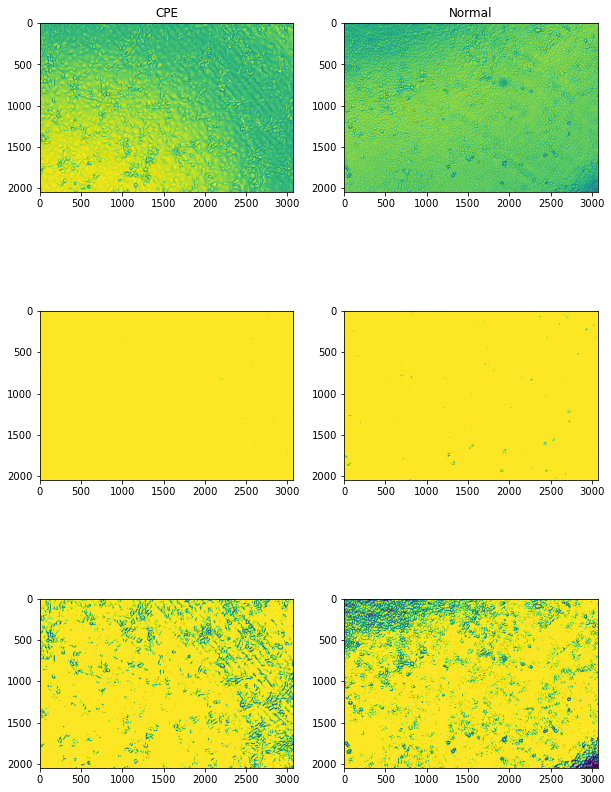

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

CPE_image_path = os.getenv('HOME') +'/Downloads/CPE.png'
Normal_image_path = os.getenv('HOME') +'/Downloads/Normal.png'


CPE_src = cv2.imread(CPE_image_path)
CPE_src = cv2.cvtColor(CPE_src, cv2.COLOR_BGR2GRAY)
no1, CPE_dst1 = cv2.threshold(CPE_src, 85, 255, cv2.THRESH_BINARY)
no2, CPE_dst2 = cv2.threshold(CPE_src, 170, 255, cv2.THRESH_BINARY)

print(CPE_src.dtype)
print(CPE_dst.dtype)

Normal_src = cv2.imread(Normal_image_path)
Normal_src = cv2.cvtColor(Normal_src, cv2.COLOR_BGR2GRAY)
no1, Normal_dst1 = cv2.threshold(Normal_src, 85, 255, cv2.THRESH_BINARY)
no2, Normal_dst2 = cv2.threshold(Normal_src, 170, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.imshow(CPE_src)
plt.title('CPE')
plt.subplot(3, 2, 3)
plt.imshow(CPE_dst1)
plt.subplot(3, 2, 5)
plt.imshow(CPE_dst2)
plt.subplot(3, 2, 2)
plt.imshow(Normal_src)
plt.title('Normal')
plt.subplot(3, 2, 4)
plt.imshow(Normal_dst1)
plt.subplot(3, 2, 6)
plt.imshow(Normal_dst2)

- 우리는 cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)로 다양한 이진화를 적용할 수 있다.
- 이진화 중 cv2.THRESH_OTSU, cv2.THRESH_TRIANGLE 은 이런 임계값을 **자동으로 결정할 때 사용한다.**
- 자동으로 임계값을 결정하도록 옵션을 지정한 경우, threshold 함수의 세 번째 인자는 사용하지 않는다.

> Q2. 이미지에 오츠 알고리즘을 적용해보세요. 2개 이상의 이미지에 오츠 알고리즘을 적용하고, 다른 점을 비교해봅시다.

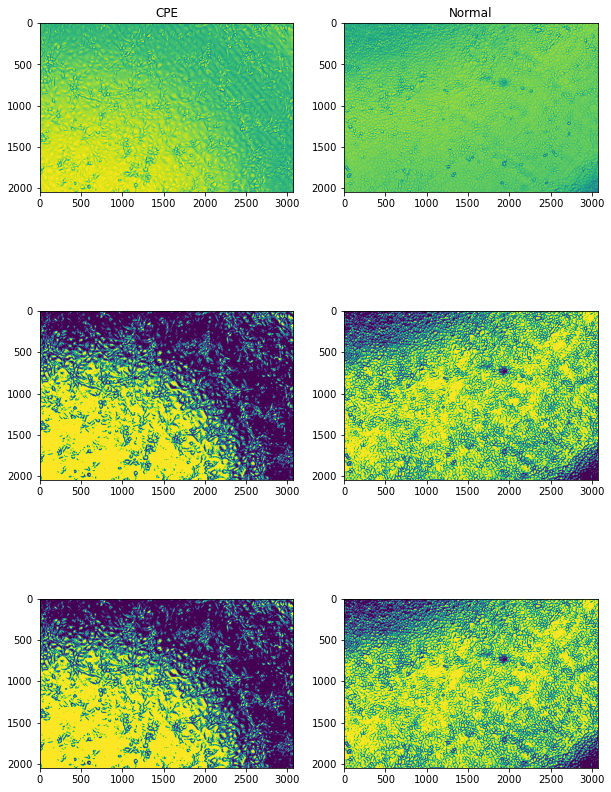

In [31]:
CPE_src = cv2.imread(CPE_image_path)
CPE_src = cv2.cvtColor(CPE_src, cv2.COLOR_BGR2GRAY)
no1, CPE_dst1 = cv2.threshold(CPE_src, 85, 255, cv2.THRESH_OTSU)
no2, CPE_dst2 = cv2.threshold(CPE_src, 170, 255, cv2.THRESH_OTSU)

Normal_src = cv2.imread(Normal_image_path)
Normal_src = cv2.cvtColor(Normal_src, cv2.COLOR_BGR2GRAY)
no1, Normal_dst1 = cv2.threshold(Normal_src, 85, 255, cv2.THRESH_OTSU)
no2, Normal_dst2 = cv2.threshold(Normal_src, 170, 255, cv2.THRESH_OTSU)

plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.imshow(CPE_src)
plt.title('CPE')
plt.subplot(3, 2, 3)
plt.imshow(CPE_dst1)
plt.subplot(3, 2, 5)
plt.imshow(CPE_dst2)
plt.subplot(3, 2, 2)
plt.imshow(Normal_src)
plt.title('Normal')
plt.subplot(3, 2, 4)
plt.imshow(Normal_dst1)
plt.subplot(3, 2, 6)
plt.imshow(Normal_dst2)

> Q3. 아래의 코드를 참고하여, GUI 트랙바가 있는 이진화 프로그램을 만들어봅시다.

In [32]:
import sys
import numpy as np

def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)
    
filename = 'CPE.png'
if len(sys.argv) > 1:
    filename = sys.argv[1]

src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

Image load failed!


SystemExit: 

/home/aiffel-dj63/anaconda3/envs/aiffel/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### c. 적응형 이진화
- threshold() 함수는 지정한 임계값을 영상 전체 픽셀에 동일하게 적용하여 이진화 영상을 생성한다.(전역 이진화)
- 그런데, 영상 특성에 따라 전역 이진화를 적용하기 어려울 때가 있다.
- ex) 균일하지 않은 조명 환경에서 촬영된 영상에 대해 전역 이진화를 수행하면 객체와 배경이 적절히 분리되지 않는 경우가 발생한다.

![image](https://user-images.githubusercontent.com/70703320/119171726-eb966300-ba9f-11eb-86ac-004485d70940.png)

#### 적응형 이진화 수행 방법
- 정해진 크기의 사각형 블록을 설정한다.
- 블록 영역 내부에서 임계값을 결정한다.
- 해당 블록을 이진화한다.

$T(x,y) = Unknown character(x,y)-C$

- 여기서 $Unknown character(x,y)$는 주변 블록 영역의 픽셀 값 평균이며, C는 임계값 크기를 조정하는 상수이다.(사용자가 직접 선정)

> Q4. 얼룩말 책을 참고하여 하나의 이미지를 불러와, 이미지에 적응형 이진화를 적용해보세요. 같은 이미지에 2개 이상의 블록 크기를 적용하여 차이를 확인해 보세요.

[참조사이트](https://opencv-python.readthedocs.io/en/latest/doc/09.imageThresholding/imageThresholding.html)

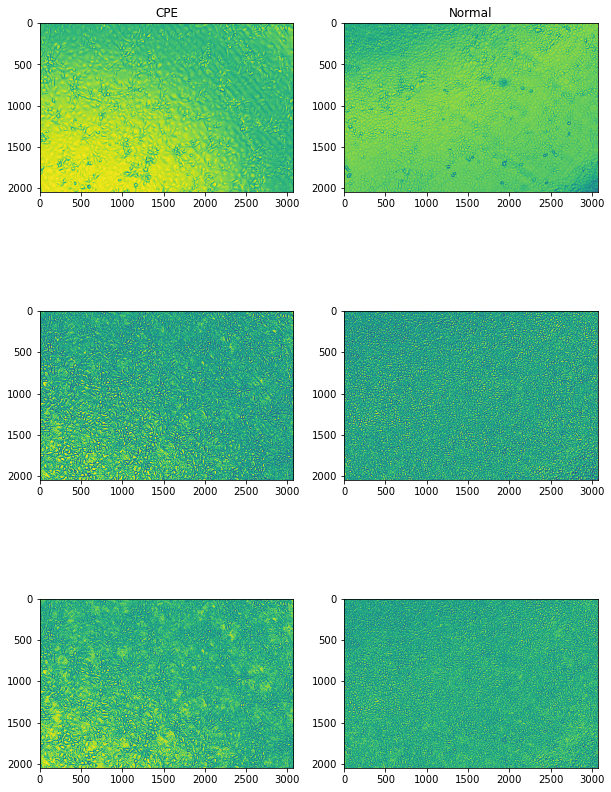

In [37]:
CPE_dst1 = cv2.adaptiveThreshold(CPE_src,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
CPE_dst2 = cv2.adaptiveThreshold(CPE_src,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

Normal_dst1 = cv2.adaptiveThreshold(Normal_src,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
Normal_dst2 = cv2.adaptiveThreshold(Normal_src,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.imshow(CPE_src)
plt.title('CPE')
plt.subplot(3, 2, 3)
plt.imshow(CPE_dst1)
plt.subplot(3, 2, 5)
plt.imshow(CPE_dst2)
plt.subplot(3, 2, 2)
plt.imshow(Normal_src)
plt.title('Normal')
plt.subplot(3, 2, 4)
plt.imshow(Normal_dst1)
plt.subplot(3, 2, 6)
plt.imshow(Normal_dst2)

> Q5. 아래의 소스코드를 참고하여, 트랙바로 블록 사이즈를 조정하는 적응형 이진화 프로그램을 만들어보세요.

In [ ]:
import sys
import numpy as np
import cv2


def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0: bsize = bsize - 1
    if bsize < 3: bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

## 모폴로지 연산
---
- 모폴로지(morphology) : 형태론 이라고 나온다. >> 형태, 또는 모양에 관한 학문
- 모폴로지 연산은 영상 내부 객체의 형태와 구조를 분석하고 처리하는 기법이다.
- 모폴로지 연산은 그레이스케일 영상과 이진 로 영상에 대해 모두 적용할 수 있지만, 주로 이진 영상에서 객체의 모양을 단순화하거나 잡음을 제거하는 용도로 쓴다.

### a. 이진 영상의 침식과 팽창
- 모폴로지 연산을 수행하려면 먼저 구조 요소(structuring element)를 정의해야 한다.
- 구조 요소란, **필터링의 마스크처럼 모폴로지 연산의 동작을 결정하는 작은 크기의 행렬이다.**

![image](https://user-images.githubusercontent.com/70703320/119173242-f4883400-baa1-11eb-9b58-c6c0d72840dd.png)

1. 침식 : 객체 영역의 외곽을 골고루 깎아내는 연산. **객체 영역은 축소되고, 배경은 확대된다.**
- 구조 요소를 영상 전체에 대해 적용하면서
- 구조 요소가 객체 영역 안에 완전히 들어간 경우
- 고정점 위치 픽셀을 255로 적용한다.

2. 팽창 : 객체 영역은 객체 외곽을 확대하는 연산. **객체 영역은 확대되고, 배경은 줄어든다.**
- 구조 요소를 영상 전체에 대해 이동시키면서
- 구조 요소와 객체 영역이 한 픽셀이라도 만나면
- 고정점 위치 픽셀을 255로 적용한다.

> Q6. 얼룩말 책의 소스코드를 참고하여, 하나의 이미지에 침식 연산을 수행해보세요.

[참고사이트](https://opencv-python.readthedocs.io/en/latest/doc/12.imageMorphological/imageMorphological.html)

### 침식

#### 방법
![image](https://user-images.githubusercontent.com/70703320/119174535-a83df380-baa3-11eb-9d06-05598500fc74.png)

#### 예시
![image](https://user-images.githubusercontent.com/70703320/119174585-b8ee6980-baa3-11eb-97c1-67ec75ca4ff5.png)

#### 효과
- 작은 Object를 제거하는 효과

> Q7. 얼룩말 책의 소스코드를 참고하여, 하나의 이미지에 팽창 연산을 수행해보세요.

### 팽창

#### 방법
![image](https://user-images.githubusercontent.com/70703320/119174791-feab3200-baa3-11eb-9eb0-59d91c53850f.png)

#### 예시
![image](https://user-images.githubusercontent.com/70703320/119174795-0074f580-baa4-11eb-9950-27ce81b80e7a.png)

#### 효과
- 경계가 부드러워지고, 구멍이 메꿔지는 효과

Text(0.5, 1.0, 'dilate')

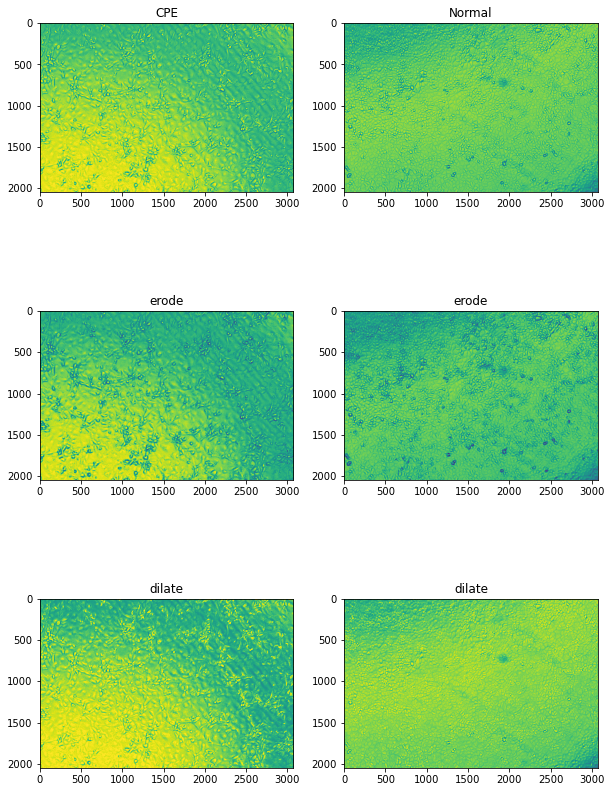

In [39]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))


CPE_dst1 = cv2.erode(CPE_src, kernel, iterations = 1)
CPE_dst2 = cv2.dilate(CPE_src, kernel, iterations = 1)

Normal_dst1 = cv2.erode(Normal_src, kernel, iterations = 1)
Normal_dst2 = cv2.dilate(Normal_src, kernel, iterations = 1)


plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.imshow(CPE_src)
plt.title('CPE')
plt.subplot(3, 2, 3)
plt.imshow(CPE_dst1)
plt.title('erode')
plt.subplot(3, 2, 5)
plt.imshow(CPE_dst2)
plt.title('dilate')
plt.subplot(3, 2, 2)
plt.imshow(Normal_src)
plt.title('Normal')
plt.subplot(3, 2, 4)
plt.imshow(Normal_dst1)
plt.title('erode')
plt.subplot(3, 2, 6)
plt.imshow(Normal_dst2)
plt.title('dilate')

### b. 이진 영상의 열기와 닫기
- 열기 : 입력 영상에 대해 침식 연산을 수행한 후, 다시 팽창 연산을 수행하는 것
- 닫기 : 입력 영상에 대해 팽창 연산을 수행한 후, 다시 침식 연산을 수행하는 것
- **열기/닫기 연산은 각각 침식과 팽창을 한 번씩 수행하기 때문에 객체 영역의 크기가 크게 변화하지 않는다.**
- 단, 적용 순서(열기/닫기)에 따라 서로 다른 효과가 발생한다.

1. 열기 연산의 경우 침식 연산을 먼저 수행하기 때문에 작은 크기의 객체가 효과적으로 제거된다.
2. 닫기 연산의 경우 팽창 연산을 먼저 수행하기 때문에 내부가 메워진다.

![image](https://user-images.githubusercontent.com/70703320/119173466-4335ce00-baa2-11eb-942e-effba3bcfb17.png)


(a) : 열기 연산을 수행한 결과. 가장자리의 작은 객체나, 튀어나온 부분들이 사라졌다. <br/>
(b) : 닫기 연산을 수행한 결과. 중간의 텅 빈 부분이 메꿔졌다.

### 열기와 닫기 연산의 차이

![image](https://user-images.githubusercontent.com/70703320/119176220-c7d61b80-baa5-11eb-9f2c-9bdff9438171.png)

> Q8. 동일한 이미지에 대해 열기와 닫기 연산을 각각 수행하고, 달라진 부분을 알려주세요.

Text(0.5, 1.0, 'close')

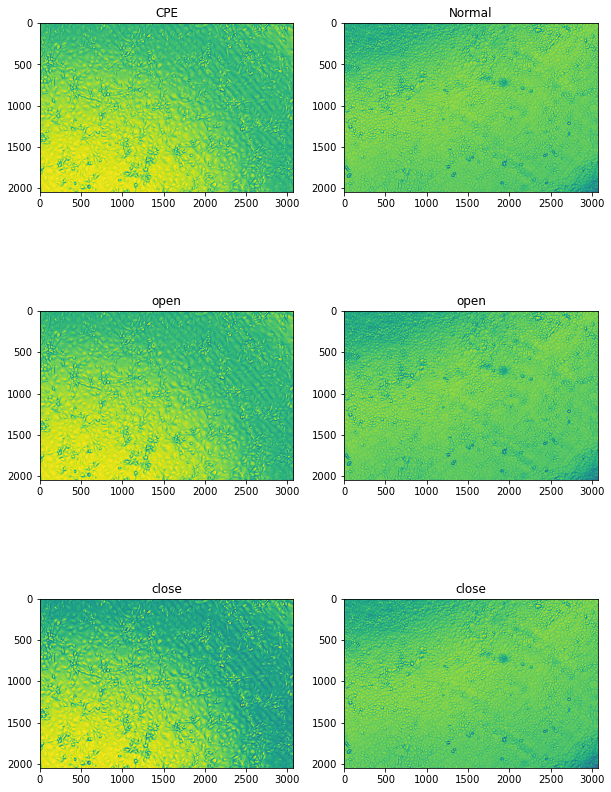

In [41]:
CPE_dst1 = cv2.morphologyEx(CPE_src, cv2.MORPH_OPEN, kernel)
CPE_dst2 = cv2.morphologyEx(CPE_src, cv2.MORPH_CLOSE,kernel)

Normal_dst1 = cv2.morphologyEx(Normal_src, cv2.MORPH_OPEN, kernel)
Normal_dst2 = cv2.morphologyEx(Normal_src, cv2.MORPH_CLOSE,kernel)


plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1)
plt.imshow(CPE_src)
plt.title('CPE')
plt.subplot(3, 2, 3)
plt.imshow(CPE_dst1)
plt.title('open')
plt.subplot(3, 2, 5)
plt.imshow(CPE_dst2)
plt.title('close')
plt.subplot(3, 2, 2)
plt.imshow(Normal_src)
plt.title('Normal')
plt.subplot(3, 2, 4)
plt.imshow(Normal_dst1)
plt.title('open')
plt.subplot(3, 2, 6)
plt.imshow(Normal_dst2)
plt.title('close')

> Q9. 오늘 배운 이진화, 모폴로지 연산이 실무에 어떻게 적용될 수 있을 지 몇 개의 사례를 찾아봅시다.

- https://www.mathworks.com/help/images/ref/imsegfmm.html
- https://kr.mathworks.com/help/images/detecting-a-cell-using-image-segmentation.html